<a href="https://colab.research.google.com/github/LoowdY/MachineLearning_PrevisaoPrecoImoveis_Riodejaneiro/blob/main/previsao_preco_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Machine Learning usando Scikit-learn para prever o preço dos imóveis no Rio de janeiro.

Utiliza-se, no projeto, regressão com Support vector machines



####**OBS**: o atual projeto teve como referência o projeto referenciado no curso "Regressão com Sklearn: desenvolvimento, previsão e otimização" da Alura

Link: https://cursos.alura.com.br/course/regressao-sklearn-desenvolvimento-previsao-otimizacao

#Importando Módulos necessários do python e lendo dados no formato json

In [1]:
import pandas as pd
import numpy as np


In [2]:
d = pd.read_json('/content/imoveis.json', orient = 'columns')
d

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


#Normalizando dados para pré-processamento do modelo de regressão

In [3]:
dados_ident = pd.json_normalize(d.ident)
dados_ident

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website
...,...,...
73610,134148-MJIBCMDQ,Website
73611,541465-QBQVXXXZ,Website
73612,800542-BZREFTQS,Website
73613,939419-ECGUNTIH,Website


In [4]:
dados_listing = pd.json_normalize(d.listing, sep = '_')
dados_listing

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,2900,2350,5,10,1,4,1024,1024,0,0,0
73611,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,15000,3000,5,7,5,6,750,1250,0,0,0
73612,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,None,None,4,5,4,3,328,328,0,0,0
73613,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,35000,2400,5,10,5,4,1024,1024,0,0,3


In [5]:
df_imoveis = pd.concat([dados_ident, dados_listing], axis = 1)
df_imoveis

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3


#Verificanado atributos do dataframe que serão relevantes para o modelo de regressão (previsão) de Machine Learning

In [6]:
for col in df_imoveis.columns:
      print('----'*15)
      print(df_imoveis[col].value_counts())


------------------------------------------------------------
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
------------------------------------------------------------
Website    73615
Name: source, dtype: int64
------------------------------------------------------------
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
------------------------------------------------------------
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
------------------------------------------------------------
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-----

#Desenvolvendo filtro do type-usage para filtar os imóveis residenciais do Rio de janeiro (maioria)

In [7]:
#adicionei uma variável filtro para faciliatar as mainupalções atuais e/ou futuras. Só deve-se mexer nesta váriável em específico
filtro = (df_imoveis['types_usage'] == 'Residencial') & (df_imoveis['address_city'] == 'Rio de Janeiro')

#desenvolvido propriamente dito o filtro
df_imoveis = df_imoveis[filtro]
df_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


#Resentando indices e mudando tipos de dados de atributos do dataframe


In [8]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [9]:
#estou resentando os indices
df_imoveis.reset_index(drop = True, inplace = True)

In [10]:
#solicitando informações novamente para verificar se os indices foram removidos
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [11]:
#aqui estou mudando os tipos de dados incorretos de alguns atributos
df_imoveis = df_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu':'float64',
    'prices_tax_condo':'float64',
    'features_usableAreas':'int64',
    'features_totalAreas':'int64',
})

In [12]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

#Última etapa de tratamento de dados - lidando com valores vazios e os substituindo

In [13]:
#verificando se há valores vazios em alguma coluna
df_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [14]:
#removendo valores vazios
df_imoveis['address_zone'] = df_imoveis['address_zone'].replace('', np.nan)

In [15]:
#validando tratamento dos valores vazios
df_imoveis.address_zone.isnull().sum()

149

In [16]:
df_imoveis


,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000.0,...,2350.0,5,10,1,4,1024,1024,0,0,0
69584,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000.0,...,3000.0,5,7,5,6,750,1250,0,0,0
69585,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000.0,...,NaN,4,5,4,3,328,328,0,0,0
69586,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000.0,...,2400.0,5,10,5,4,1024,1024,0,0,3


In [17]:
#fazendo a técnica de dados de proxy ( verifica-se a dependência de dois atributos de um dataframe e se
#faz uma espécie de substituição - normalmente se faz isso com médias, no caso de dados numéricos)

dicionario = df_imoveis[~df_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dicionario)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [18]:
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dicionario}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [19]:
for bairro,zona in dic_zonas.items(): df_imoveis.loc[df_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [20]:
df_imoveis['address_zone'].isnull().sum()

0

In [21]:
df_imoveis.prices_tax_iptu.isnull().sum()

8725

In [22]:
df_imoveis.prices_tax_condo.isnull().sum()

6061

In [23]:
#removendo dados vazios dos atributos prices_tax_iptu e prices_tax_condo

df_imoveis.prices_tax_iptu.fillna(0, inplace = True)
df_imoveis.prices_tax_condo.fillna(0, inplace = True)


In [24]:
#removendo atributos (colunas) do dataframe que não são relevantes para o modelo de regressão (afim de otimizar o treinamento e desenvolvimento do modelo)
df_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [25]:
#renomeando nome de colunas para maior legibilidade
#essa etapa não é obrigatória, apenas para maior comodidade

dicionario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

df_imoveis = df_imoveis.rename(dicionario_colunas, axis = 1)
df_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


#Analisando correlação entre as variáveis


In [26]:
#utilizei um método para analisar as correlações
correlacao = df_imoveis.corr()


<ipython-input-26-ac7b7bf307b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_imoveis.corr()


In [27]:
#importando bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

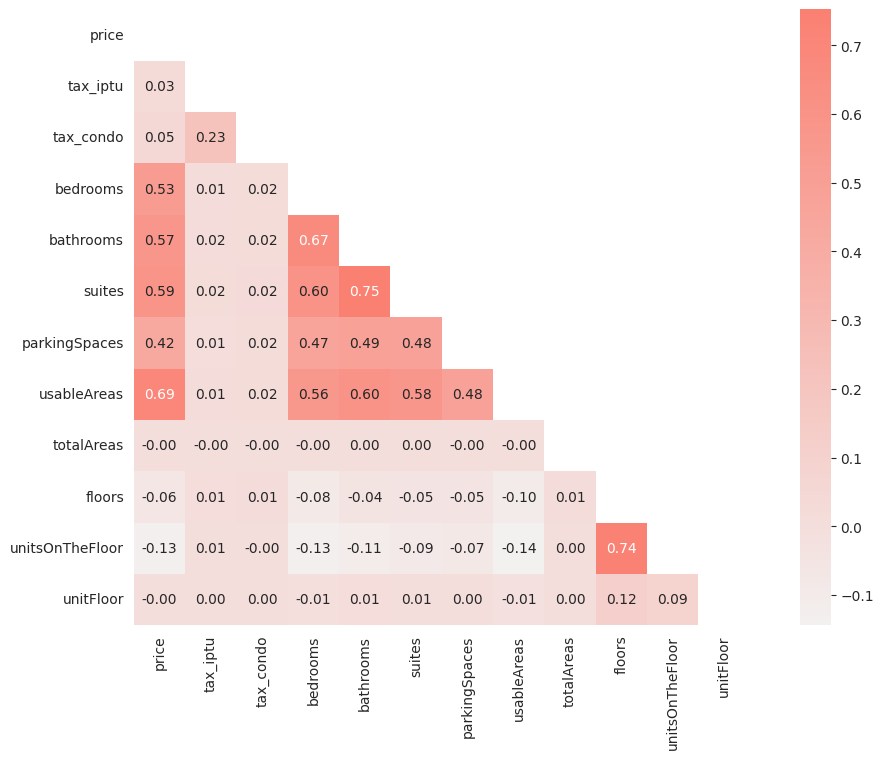

In [28]:
#visualizando correlações

cores = sns.color_palette('light:salmon', as_cmap=True)

mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  f, ax = plt.subplots(figsize = (13,8))
  ax = sns.heatmap(correlacao, cmap = cores, mask = mask, square = True, fmt = '.2f', annot = True )

Text(0.5, 0, 'Preço')

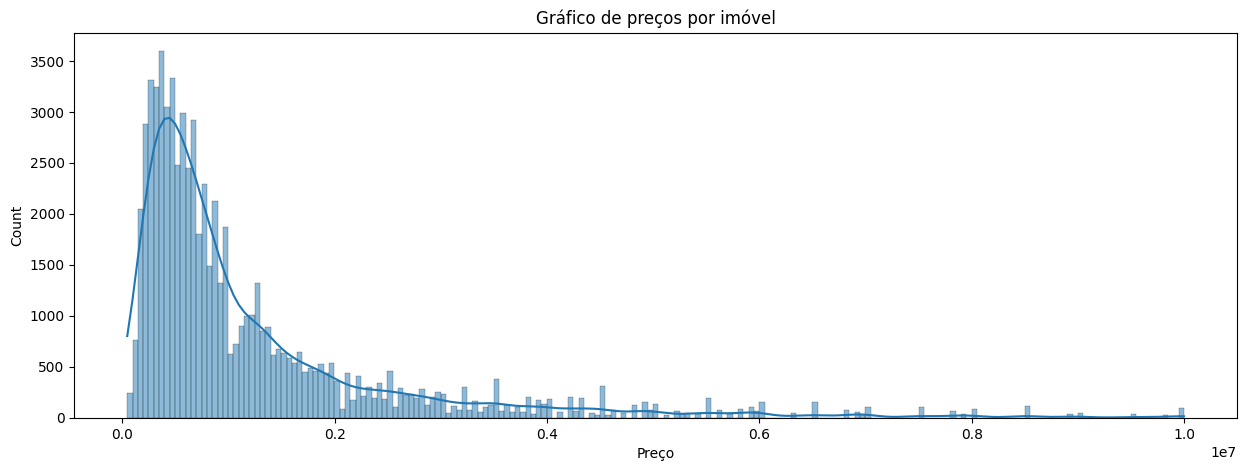

In [29]:
#desconfia-se da distribuição de dados ser tendenciosa para algumas variáveis.
#Deve-se, portanto, verificar essa distribuição e validá-la.
ax = sns.histplot(data=df_imoveis,x='price', kde=True)
ax.figure.set_size_inches(15,5)
ax.set_title('Gráfico de preços por imóvel')
ax.set_xlabel("Preço")

In [30]:
#utilizando transoiformação logarítmica de variáveis para se obter um distribuição simétrica (masi proxima de uma curva de gauss perfeita) para posteriormenmte aplicar o algoritmo de Regressão Linear
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(df_imoveis.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [31]:
colunas_transformados = df_imoveis.select_dtypes(exclude = ['object']).columns
df_transformado = pd.concat([df_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_transformados)], axis=1)

<ipython-input-32-51372c5aba93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_transformado = df_transformado.corr()


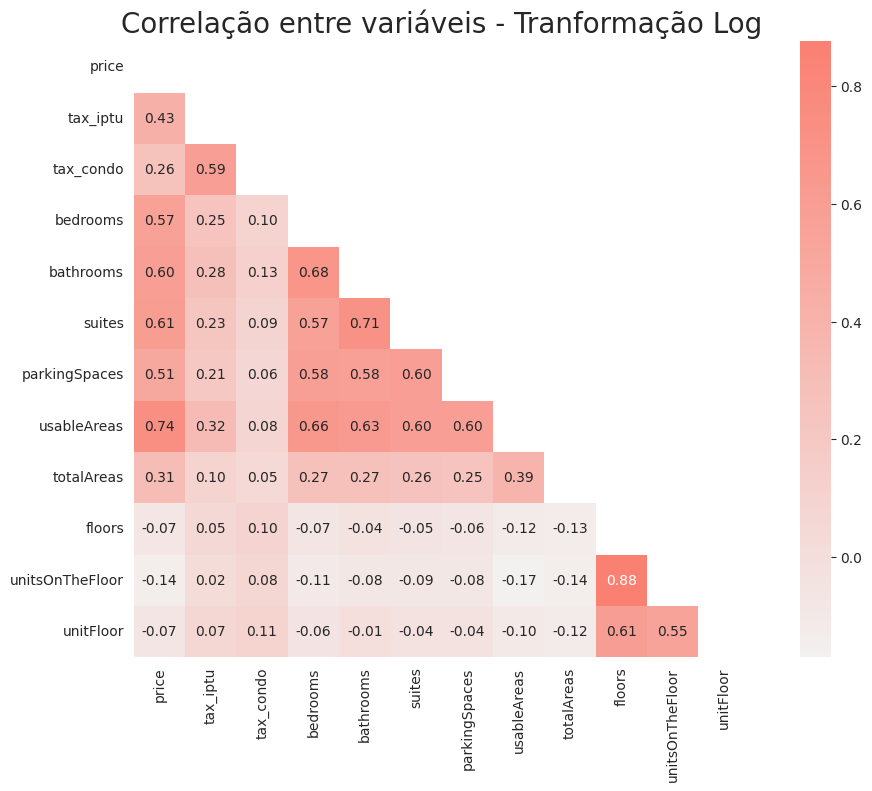

In [32]:
#visualizando correção logarítmica
correlacao_transformado = df_transformado.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

Text(0.5, 0, 'Preço')

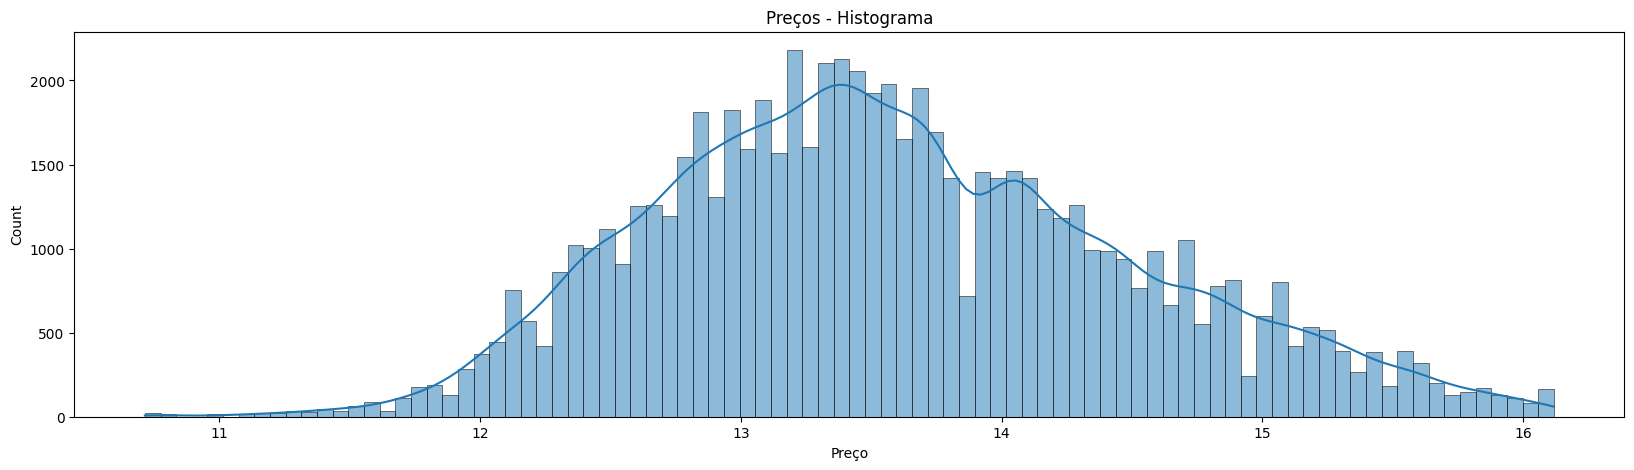

In [33]:
#como foi aplicado um modelo matemático na distribuição normal para "normalizar" a distribuição e não ter que se enviar dados
#enviesados para o modelo de machine learning

ax = sns.histplot(data=df_transformado, x='price', kde= True)
ax.figure.set_size_inches(20,5)
ax.set_title('Preços - Histograma')
ax.set_xlabel('Preço')

In [34]:
#validando as variaveis categoricas
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
variaveis_categoricas

#nota-se que deve-se possui apenas duas variaveis categóricas ('unit' e 'zone')

Index(['unit', 'zone'], dtype='object')

In [35]:
#convertendo variáveis categóricas com o get_dummies do pandas (0 ou 1) para jogarmos para o modelo de regressão
#o resultodo
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
69583,0,1,0,0,0,1,0
69584,0,1,0,0,0,1,0
69585,1,0,0,0,0,0,1
69586,0,1,0,0,0,1,0


In [36]:
'''
Após criar-se um DataFrame apenas com os dummies das variaveis categoricas, juntearei os dois dataframes excluindo (fazendo um drop)
nas colunas de variáveis categóricas. Isso ocorre devido o fato de que variáveis categóricas não irão ser utilizadas em modelos de machine learning com
regressão, uma vez que a regressao apenas prevê valores numéricos
'''
dados_imoveis_dm = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
dados_imoveis_dm

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69585,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,1,0,0,0,0,0,1
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,0,1,0,0,0,1,0


#Aplicando a Regressão Linear


In [37]:
#variáveis independentes ('X')

x = dados_imoveis_dm.drop('price', axis = 1)


#variavel dependente ('y')

y = dados_imoveis_dm['price']


In [38]:
#realizando import do método que será utilizado para divisão do DatFrame de teste e treino
#e realizando import do módulo de regressão linear

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#invocando função para divisão
#Verifique que o conjunto de teste será de 0.3, ou seja, 30%.
#O estado de aletoriedade foi definido como 42

x_treino,x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)


In [39]:
#instanciando modelo de regressao linear a partir da biblioteca ScikitLearn
lr = LinearRegression()

In [40]:
'''
A função fit nesse caso será considerada como a fução que receberá o que estiver sendo atribuindo,
a partir do método 'train_test_split', às variáveis 'x_treino' e 'y_treino'. É a função de teste.
'''

lr.fit(x_treino, y_treino)


LinearRegression()

In [41]:
#função para receber os dados de teste

lr_previsao_01 = lr.predict(x_teste)

#printando resultaddos da previsao de preços

lr_previsao_01

#deve-se lembrar que se realizou uma transformação logarítmica para normalizar a distribuição dos dados
#agora, deve-se fazer a transformação inversa para os dados corresponderem a realidade. Isso será feito logo a frente

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [42]:
#realizando transformaçõao inversa (exemplificando/testando)
np.expm1(13.25768024)

572448.7513552749

In [43]:
#importando módulo p/calculo do coenficiente de determinação
#importando r2
from sklearn.metrics import r2_score

#realiznado o calculo
r2_lr = r2_score(y_teste, lr_previsao_01)

#printando na tela os resultados

r2_lr


0.7880682093407632

#Utilizando Random Forests para Regressão (optei por esse método)
Random Forests são basicamente algoritmos que criam diversas árvores de decisão e fazem uma média (para resultados numéricos) de todos os resultados de cada flores ou calculam a moda (mais frequente) a partir de todos os resultados das árvores para resultados de classificação.

Mais explicações (extraído diretamente da internet)   
**RandomForest**: este algoritmo cria uma floresta aleatória, com muitas árvores de decisão, sendo que para construção de cada uma dessas árvores, os dados não são utilizados em sua totalidade. Serão selecionadas algumas amostras dos dados, de maneira aleatória, através de bootstrap, um método de reamostragem que permite amostras repetidas na seleção. Para criação dos nós das árvores, também existirá uma etapa aleatória, onde algumas variáveis serão selecionadas de forma randômica.

**Ensemble**:  Esse método constroe vários modelos de machine learning, utilizando o resultado de cada modelo na definição de um único resultado, obtendo-se assim um valor final único.


Fonte:  https://didatica.tech/metodos-ensemble/



In [44]:
#realiznado imports necessários


from sklearn.ensemble import RandomForestRegressor

In [45]:
#o rando_state deixa o modelo reprodutível, o max_depth é a profundida máxima de cada árvore e o n_stimators é o número de árvores na floresta
rf = RandomForestRegressor(random_state = 42, max_depth = 5, n_estimators = 10)

In [51]:
rf.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [52]:
previsao_random_forest = rf.predict(x_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


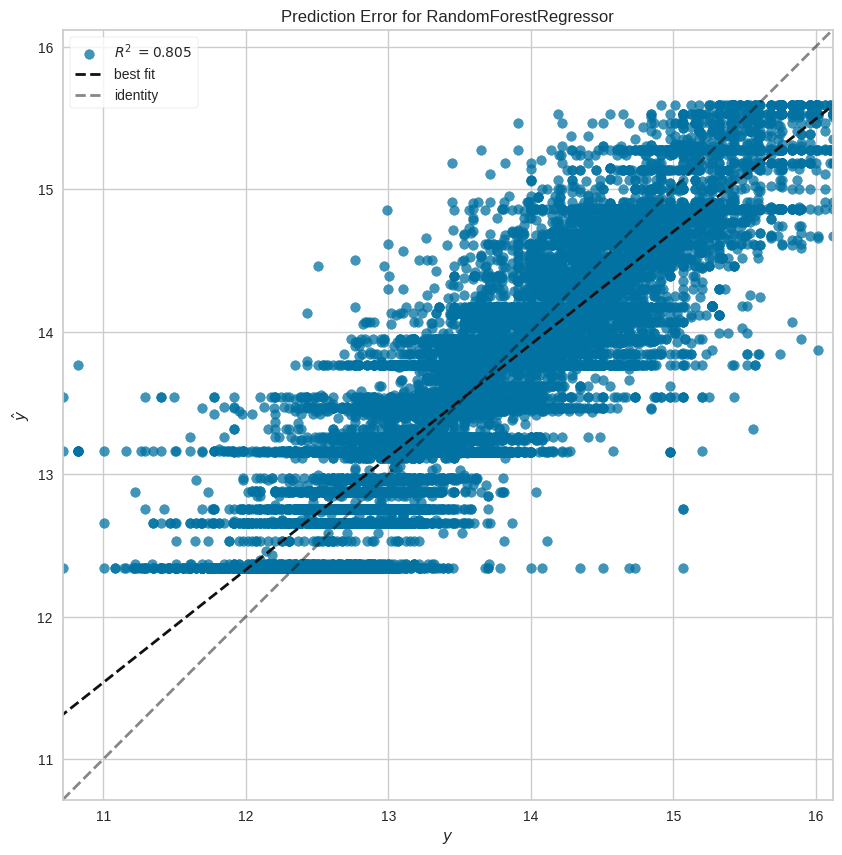

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [54]:
#plotando gráfico de erro de predição
from yellowbrick.regressor import PredictionError


fix, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(rf)
pev.fit(x_treino, y_treino)
pev.score(x_teste, y_teste)
pev.poof()


Verifica-se que o modelo possui acurácia maior que 80% de acerto, o que é ótimo para a confiabilidade do modelo.

In [55]:
#calculando métricas (r2)
r2_rf = r2_score(y_teste ,previsao_random_forest)

#printando métricas (r2)
r2_rf

0.805273364453047

#Otimizando o modelo de Random forest

In [62]:
#importando métodos necessários

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


#determinadno o "K"

cv = KFold(n_splits = 5, shuffle = True)

In [57]:
desemp_cross_r2 = cross_val_score(estimator = rf,
                                  X = x_treino,
                                  y = y_treino,
                                  scoring = 'r2',
                                  cv = cv)
print('Desempenho médio de r2: {}'.format(round(desemp_cross_r2.mean(), 3)))


Desempenho médio de r2: 0.8


In [59]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [63]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [65]:
#rodando otimizador
rf_random_cv = random_cv_rf.fit(x_treino, y_treino)

In [69]:
#imprimindo resultados da otimização do modelo Random Forests (regressão)
pd.DataFrame(rf_random_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,66.300567,12.536811,0.805413,0.350756,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.889392,0.897146,0.897236,0.893349,0.893404,0.894105,0.002909,2
1,56.458053,1.673926,0.713767,0.187774,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.889451,0.897221,0.897268,0.893330,0.893424,0.894139,0.002913,1
2,41.242077,1.493057,0.650388,0.271236,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.889239,0.897156,0.897215,0.893195,0.893308,0.894022,0.002970,3
3,59.946111,5.071467,1.012015,0.357489,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.889085,0.896898,0.896892,0.893061,0.893099,0.893807,0.002913,4
4,38.975890,3.708305,0.579208,0.245222,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.888834,0.896810,0.896849,0.892896,0.892958,0.893669,0.002982,5


In [88]:
rf_random_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [89]:
#aqui se prova que o modelo está otimizado (melhor), uma vez que a sua taxa de acerto é de aproximadamente 90%
rf_random_cv.best_score_

0.8941388651075615

#Treinando modelo otimizado


In [90]:
rf_otim = RandomForestRegressor(random_state = 42, max_depth = 30, n_estimators = 200, min_samples_leaf = 3 , min_samples_split = 8)

In [94]:
rf_otim.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [97]:
predict_rf_otimizado = rf_otim.predict(x_teste)

In [98]:
#provando-se taxa de acerto alta.
r2_score(y_teste, predict_rf_otimizado )

0.8950447657106755

#Testando o modelo (previsão)


In [99]:
Joao_renan_cliente = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
Joao_renan_cliente

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [104]:
#testando e verificnado resultados da predição (etapa final)
predicao_joaoRenan_cliente = rf_otim.predict(Joao_renan_cliente)

#convertendo (invertendo de volta) valor de resultado (faz-isso devido distribuição nromal ter sido normalizada,
#etapa: analisando correlações entre as variávies)
np.expm1(predicao_joaoRenan_cliente)


array([284216.62604224])

#assim, o imóvel do Cliente João Renan tende a custar: R$ 284.216 (duzentos e oitenta e quatro mil e duzentos e dezesseis reais)

# Fim do projeto de machine learning.
Relembrando que o projeto busca prever os valores do imóveis no Rio de Janeiro a partir deos dados de uma base de dados (json).

Concluíu-se com sucesso o desenvolvimento do Modelo de Regressão utilizando Machine Learning e Random Forests (ensamble).
